**Датасет - лесные пожары**
<br>Линейная регрессия

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score, accuracy_score

import seaborn as sns

%matplotlib inline

In [3]:
fires = pd.read_csv('forestfires.csv')
fires.sample(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
195,2,5,aug,fri,93.9,135.7,586.7,15.1,23.5,36,5.4,0.0,10.02
358,6,3,sep,fri,92.5,122.0,789.7,10.2,19.7,39,2.7,0.0,0.00
485,2,4,aug,mon,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,2.07
200,1,5,sep,tue,91.0,129.5,692.6,7.0,21.6,33,2.2,0.0,11.53
209,8,3,sep,thu,93.7,80.9,685.2,17.9,23.2,26,4.9,0.0,23.41
166,6,5,aug,wed,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0,2.29
449,7,4,aug,sun,91.6,181.3,613.0,7.6,19.3,61,4.9,0.0,0.00
432,8,6,aug,thu,94.8,222.4,698.6,13.9,23.9,38,6.7,0.0,0.00
295,7,5,jun,sun,93.1,180.4,430.8,11.0,22.2,48,1.3,0.0,0.00
490,4,4,aug,wed,95.1,141.3,605.8,17.7,28.7,33,4.0,0.0,0.00


In [4]:
fires.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [12]:
fires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


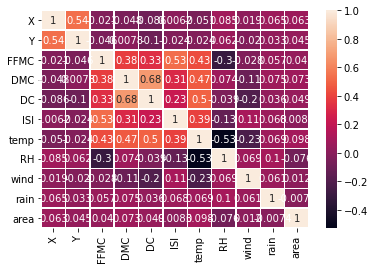

In [11]:
sns.heatmap(fires.corr(), annot=True, linewidths=.5, square=False)

In [15]:
y = fires[['temp']]
X = fires[['FFMC', 'DMC', 'DC', 'ISI', 'RH', 'wind', 'rain']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45)
y_pred = LinearRegression().fit(X_train, y_train).predict(X_test)

In [16]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(RMSE)
print(r2)

3.639536919544733
0.6529575725003232


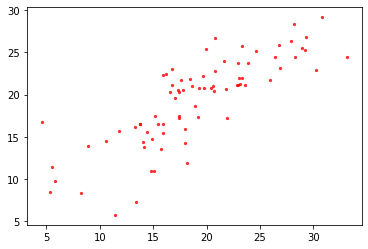

In [17]:
_, view = plt.subplots()
view.scatter(y_test, y_pred, s = 5, color = "r", alpha = 0.75)
display()

**Датасет - банкноты**
<br>Логистическая регрессия

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [88]:
pd.options.display.max_columns = 999
titles = ["variance of image", "skewness of image", "curtosis of image", "entropy of image", "class"] 
data = pd.read_csv("data_banknote_authentication.txt", names=titles)

data.sample(10)

,variance of image,skewness of image,curtosis of image,entropy of image,class
962,-1.80760,-8.813100,8.70860,-0.21682,1
549,3.52880,0.715960,1.95070,1.93750,0
1240,-3.55100,1.895500,0.18650,-2.44090,1
729,-0.95923,0.091039,6.22040,-1.48280,0
1034,0.67886,4.119900,-4.56900,-4.14140,1
1349,-1.58510,-2.156200,1.70820,0.90170,1
757,2.66060,3.168100,1.96190,0.18662,0
689,3.02420,-3.337800,2.58650,-0.54785,0
761,2.25040,3.575700,0.35273,0.28360,0
1280,-3.35530,0.355910,2.64730,-0.37846,1


In [89]:
data.isna().sum()

variance of image    0
skewness of image    0
curtosis of image    0
entropy of image     0
class                0
dtype: int64

In [90]:
X = data.drop(columns=["class"]).copy()
y = data["class"]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=25)
LR = LogisticRegression()

In [92]:
y_pred = LR.fit(X_train, y_train).predict(X_test)

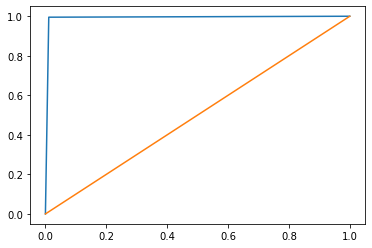

In [96]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'-')
plt.show()

In [97]:
accuracy_score(y_test, y_pred)

0.9916839916839917